In [3]:
import numpy as np
import pandas as pd
import math

# Class exercises

__Exercise 1.__ Suppose a coin is weighted such that, when tossed it comes up heads 70% of times. What is the entropy of this coin?

In [14]:
p=0.7
entropy = -p*np.log2(p) - (1-p)*np.log2(1-p)
entropy

0.8812908992306927

__Exercise 2.__ What is the entropy of a fair dice? 

In [18]:
p=1/6

In [27]:
entropy = -np.log2(p)
entropy

2.584962500721156

__Exercise 3.__ What is the entropy of a dice that shows 
- "1": 20% of times, 
- "2": 10% of times,
- "3": 5% of times,
- "4": 20% of times,
- "5": 30% of times,
- "6": 15% of times    

In [33]:
entropy=-(0.2*np.log2(0.2))-(0.1*np.log2(0.1))-(0.05*np.log2(0.05))-(0.2*np.log2(0.2))-(0.3*np.log2(0.3))-(0.15*np.log2(0.15))
entropy

2.408694969562842

In [ ]:
#It looks good because the maximum entrhopy is when its fair (MAXIUM randomness en gros)

__Exercise 4.__ Compute the Kullback-Leibler divergence between the dice of Exercise 2 and the dice of Exercise 3.

In [34]:
p=np.ones(6)/ 6
q = np.array([0.2, 0.1, 0.05, 0.2, 0.3, 0.15])
kl = np.sum(p*np.log2(p / q))
kl

0.20864476059248735

# Assignment 4.2

This time we are going to work with the diabetes dataset.


In [35]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt

dataset = datasets.load_diabetes(return_X_y=False)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [36]:
# Define the feature matrix
data = dataset.data
# Define the target
target = dataset.target

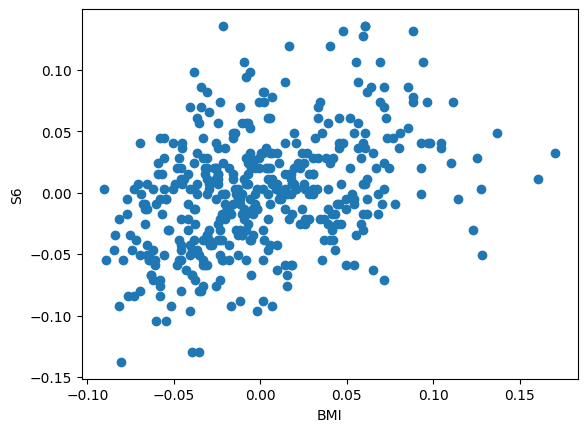

In [37]:
plt.scatter(data[:,2], data[:,9])
plt.xlabel('BMI')
plt.ylabel('S6')
plt.show()

__Exercise 1.__ Investigate the relationship between body mass index (data[:,2]) and S6 (data[:,9]). By using the AIC score seen during lesson, can you verify which hypothesis is better supported by the data?

- there is no relationship (constant)
- the relationship is linear
- the relationship is quadratic
- the relationship is cubic
- the relationship is polynomial of order 4

In [135]:
poly = PolynomialFeatures(degree=4)
lr = LinearRegression()

In [169]:
def fit_poly(x,y,d):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

In [209]:
d=6
loglik = []
AIC = []
BIC = []

x=data[:,2]
y=data[:,9]

for d in range(1,d):
    x_poly = np.array([x**i for i in range(d)]).T
    w_ml, sigma2_ml = fit_poly(x_poly,y,d)
    loglik.append(Gaussian_loglik(x_poly,y,w_ml,sigma2_ml))
    dev = -2*np.array(Gaussian_loglik(x_poly, y, w_ml, sigma2_ml))
    AIC.append(dev+2*len(w_ml))
    BIC.append(dev+2*len(w_ml)*np.log(len(x)))



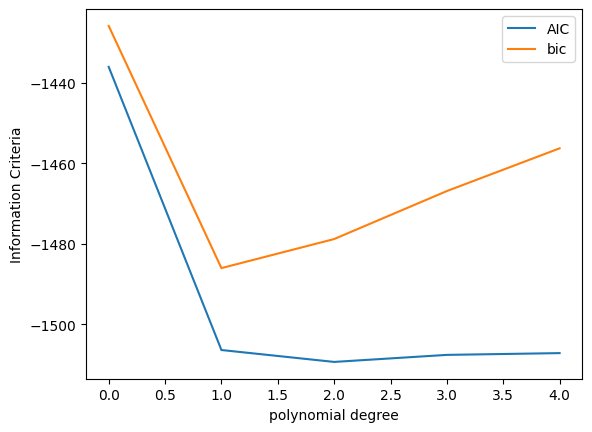

In [211]:
plt.plot(range(0,d), AIC, label = "AIC")
plt.plot(range(0,d), BIC, label = "bic")

plt.ylabel('Information Criteria')
plt.xlabel('polynomial degree')
plt.legend()
plt.show()

In [205]:
AIC

[-1436.0173045254114,
 -1506.4085348469896,
 -1509.3675404001476,
 -1507.6167371575225,
 -1507.1778729555933]

__Exercise 2.__ Repeat the exercise by using the BIC. Discuss the differences in the results, if any.

In [ ]:
#in question 1

__Exercise 3.__ Which model would you support between the following:

- target depends on _Age_
- target depends on _Age_ and _Sex_
- target depends on _Age_ and _Body mass index_ 
- target depends on _Age_ and _Body mass index_ and _Average blood pressure_
- target depends on _Age_ and _Sex_ and _Body mass index_ 
- target depends on _Age_ and _Sex_ and _Body mass index_ and _Average blood pressure_
- target depends on  _Body mass index_ and _Average blood pressure_

Use any metric (or more metrics) at your discretion, and comment the results

In [212]:
indices=[[0],[0,1],[0,2],[0,2,3],[0,1,2],[0,1,2,3],[2,3]]

In [214]:
lr=LinearRegression()

In [218]:
list_deviance=[]
list_aic=[]
list_bic=[]

for k in indices:
    
   # X_train, X_test, y_train, y_test = train_test_split(dataset, dataset.target, test_size=0.2, random_state=42)
    solution=fit_regression(data[:,k],target)
    Deviance=
    list_deviance.append(Deviance)
    list_aic=(Deviance)
    x=data[indices[k]]


TypeError: list indices must be integers or slices, not list

In [216]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59